# **EXPLORING PERSONAL KEY INDICATORS OF HEART DISEASE DATASET USING PYTHON**

## About Dataset
Personal Key Indicators of Heart Disease covers indicators of heart disease as leading causes of death for people of most races in the United States ([CDC](https://www.cdc.gov/heartdisease/risk_factors.htm), 2023). The most recent dataset (as of February 15, 2022) includes data from 2020. It also includes 1 of 3 variables related to heart disease, high blood pressure, high cholesterol, and smoking. Other variables also available, such as diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. The dataset contains 401,958 rows and 279 columns, collected through annual telephone surveys in the US. But, the dataset, now available on [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) and cleaned by Kamil Pytlak, has undergone some modifications from the original CDC dataset. It contains 319,795 records and 18 variables (further, will be 19 by adding BMIClass column), reducing the number of columns from the original dataset. This dataset can be used for exploratory data analysis and machine learning applications, particularly in predicting heart disease using classifier models.

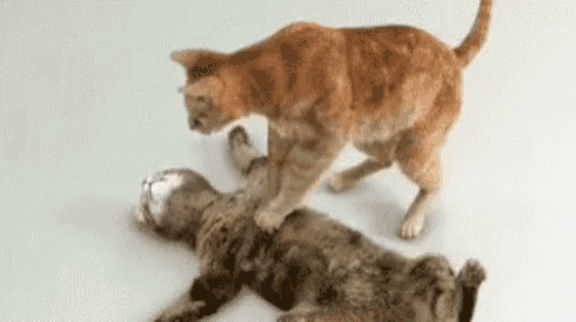

In [ ]:
#Let's import the project's cover image
from PIL import Image
image = Image.open('/content/tenor.gif')
image.show()

## Importing Required Libraries and Loading Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [69]:
#Let's import the file and read it
df = pd.read_csv('/content/heart_2020_cleaned.csv')

## Overview of the Dataset

In [70]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [71]:
df.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
152687,No,16.69,Yes,No,No,0.0,0.0,Yes,Male,65-69,Black,No,Yes,Good,8.0,No,No,No
118990,No,36.58,No,No,No,5.0,0.0,Yes,Female,75-79,Black,Yes,No,Fair,7.0,No,No,No
319531,Yes,33.91,No,No,No,2.0,4.0,No,Male,45-49,Hispanic,No,Yes,Good,7.0,No,No,No
128504,No,24.41,No,No,No,0.0,15.0,No,Male,25-29,White,No,Yes,Very good,7.0,No,No,No
136180,No,34.08,Yes,Yes,No,0.0,0.0,No,Male,50-54,White,No,Yes,Excellent,7.0,No,No,No
190275,No,24.21,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Very good,6.0,No,No,No
90902,No,25.51,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,8.0,No,No,No
220645,No,26.52,Yes,Yes,No,30.0,5.0,No,Female,65-69,White,No,No,Good,6.0,No,No,No
187042,No,27.37,No,No,No,0.0,5.0,No,Male,80 or older,White,No,Yes,Excellent,6.0,No,No,No
265359,Yes,27.52,Yes,No,Yes,15.0,15.0,Yes,Female,75-79,White,No,Yes,Good,9.0,No,Yes,No


In [72]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [73]:
df.shape

(319795, 18)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [75]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

*   If we also see the head of dataset, it has 18 columns and 319795 rows, with 9 boolean values, 5 strings, and 4 decimals
*   We're so lucky! there are no null values here


---


*   Now let's see if there are any duplicate records


In [76]:
df.duplicated().sum()

18078



*   Let's explore unique values in each columns



In [77]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64



*   It's clear that this type of dataset had duplicate records, because the types of data are mostly non-continous

---



*   To support data interpretation, a BMIClass column will be added





In [78]:
#Add BMIClass function to support data interpretation
def BMIClass(BMI):
  if BMI < 18.5:
    return 'Underweight'
  elif 18.5 <= BMI <= 22.9:
    return 'Normal'
  elif 23 <= BMI <= 24.9:
    return 'Overweight'
  elif 25 <= BMI <= 29.9:
    return 'Obesse I'
  else:
    return 'Obesse II'

In [79]:
#Apply BMIClass to the Dataset
df['BMIClass'] = df['BMI'].apply(BMIClass)

In [80]:
df[['BMI','BMIClass']].head()

,BMI,BMIClass
0,16.60,Underweight
1,20.34,Normal
2,26.58,Obesse I
3,24.21,Overweight
4,23.71,Overweight


In [81]:
df.shape

(319795, 19)



*   Let's see basic statistics for the numerical variables



In [82]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


*   It seems to be the columns of BMI and SleepTime contains outliers because  mean is considerable higher than median in both columns. PhysicalHealth and MentalHealth columns are on different cases, because it's possible if people suffering whether on physical or mental health every single day *Hope they are fine now

In [83]:
df.describe(include='object').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


## Exploratory Data Analysis



###   Exploring Respondent Demographic



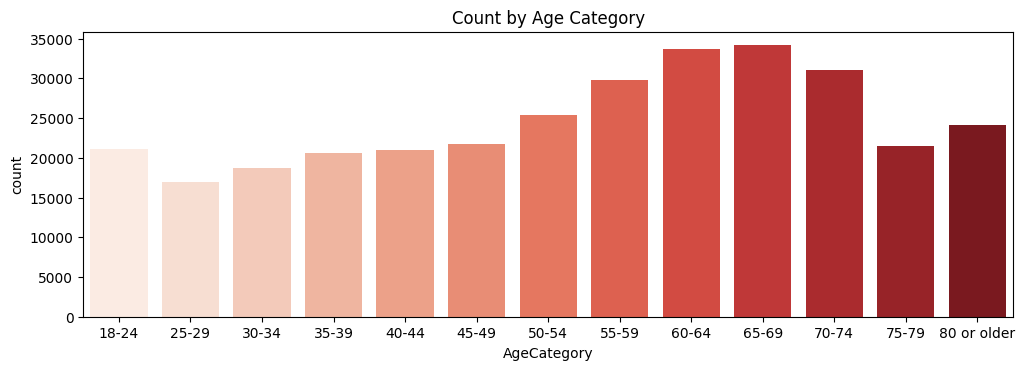

In [84]:
#Age Category
plt.figure(figsize=( 12,3.7))
plt.title('Count by Age Category')
sns.countplot(x=df['AgeCategory'].sort_values(), data=df, palette='Reds')
plt.show()

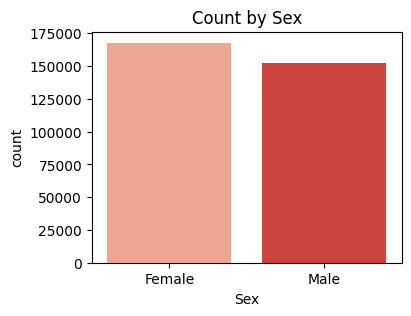

In [85]:
#Sex
plt.figure(figsize=(4,3))
plt.title('Count by Sex')
sns.countplot(x=df['Sex'].sort_values(), data=df, palette='Reds')
plt.show()

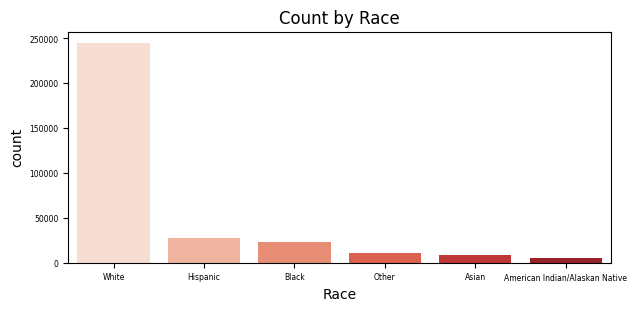

In [86]:
#Race
plt.figure(figsize=(7,3))
plt.xticks(size=5.5)
plt.yticks(size=5.5)
plt.title('Count by Race')
sns.countplot(x='Race',data=df, palette=('Reds'), order=df['Race'].value_counts().index)
plt.show()

Insights:
*   Most people were aged 60-74 years old.
*   Most people were Female, but the gaps looked not too far
*   Respondents were dominated by White race





---


*   Let's look the distribution of target variable



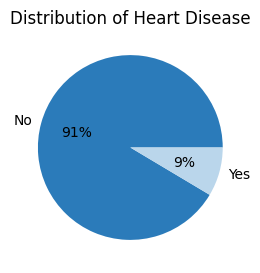

In [87]:
#Distribution of Heart Disease
plt.figure(figsize=(4,3))
plt.title('Distribution of Heart Disease')
plt.pie(data=df, x=df['HeartDisease'].value_counts(), labels=df['HeartDisease'].value_counts().index,\
        autopct='%.0f%%', colors=('#2b7bba','#bad6eb'))
plt.show()


Insight:
*   Most people are healthy, about 9% people suffer with heart disease



### Visualizing Continous and Discrete Data

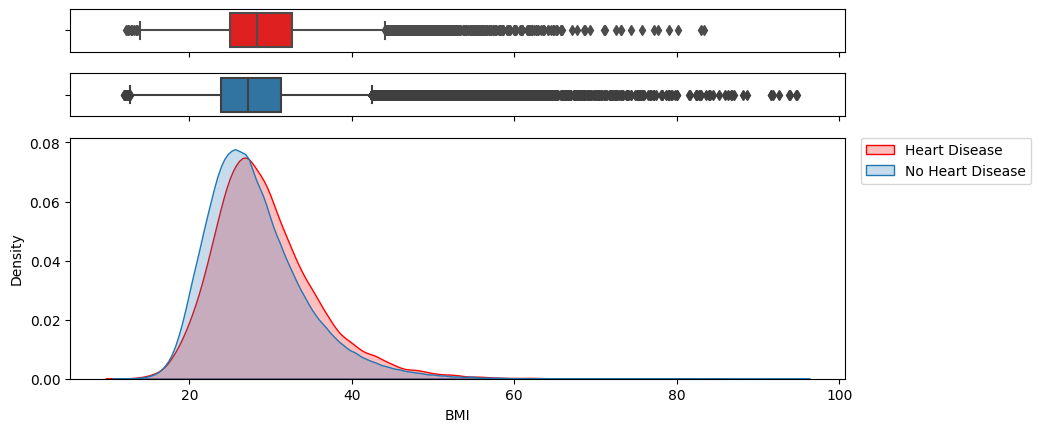

In [88]:
fig, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={'height_ratios': (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="red")
sns.kdeplot(df[df['HeartDisease']=='Yes'], x="BMI", fill=True, ax=ax_hist, color="red")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2)
sns.kdeplot(df[df['HeartDisease']=='No'], x="BMI", fill=True, ax=ax_hist)
fig.set_figwidth(10)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')
plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

Insight:
*   People with Heart Disease are found to have a higher BMI than those who didn't

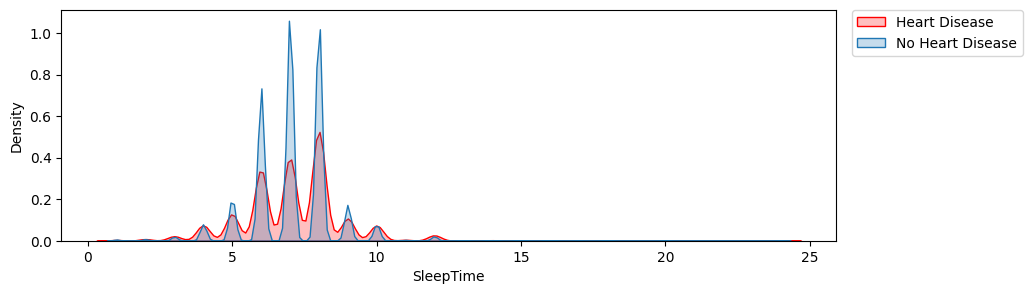

In [89]:
fig, ax = plt.subplots(figsize=(10,3))
sns.kdeplot(df[df['HeartDisease']=='Yes'], x="SleepTime", fill=True, color="red")
sns.kdeplot(df[df['HeartDisease']=='No'], x="SleepTime", fill=True)
ax.legend(loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

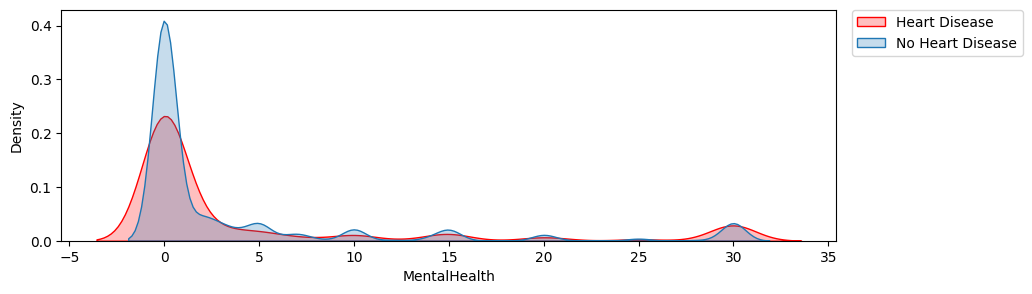

In [90]:
fig, ax = plt.subplots(figsize=(10,3))
sns.kdeplot(df[df['HeartDisease']=='Yes'], x="MentalHealth", fill=True, color="red")
sns.kdeplot(df[df['HeartDisease']=='No'], x="MentalHealth", fill=True)
ax.legend(loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

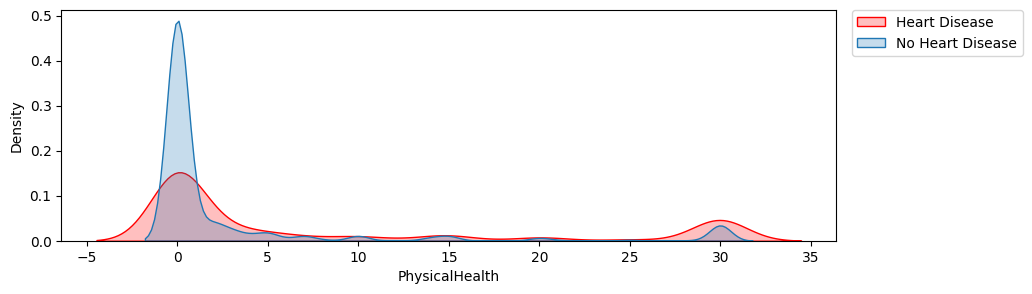

In [91]:
#fig, (box1,box2,hist) = plt.subplots(3, figsize=(10,3))
# assigning a graph to each ax
fig, ax = plt.subplots(figsize=(10,3))
sns.kdeplot(df[df['HeartDisease']=='Yes'], x="PhysicalHealth", fill=True, color="red")
sns.kdeplot(df[df['HeartDisease']=='No'], x="PhysicalHealth", fill=True)
ax.legend(loc=2, labels=['Heart Disease', 'No Heart Disease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### Visualizing Categorical Data

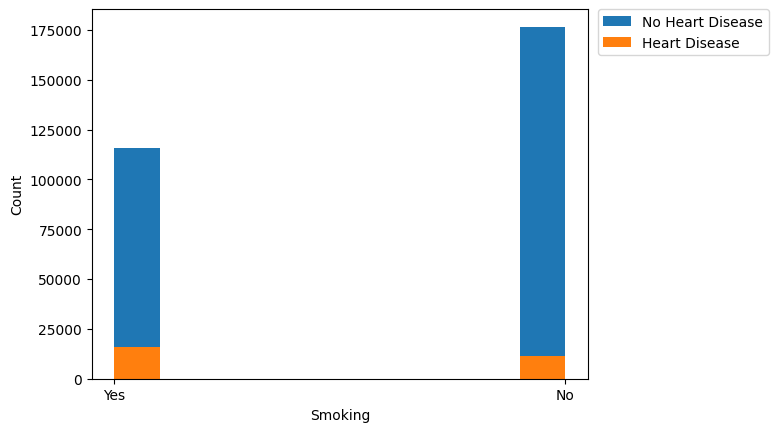

In [92]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], label="Heart Disease")
ax.set_xlabel("Smoking")
ax.set_ylabel("Count")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

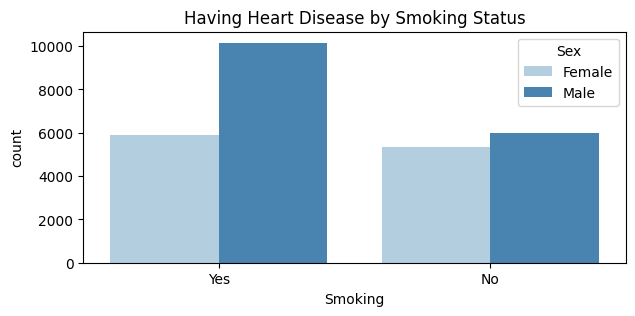

In [93]:
#Smokers with Heart Disease
plt.figure(figsize=(7,3))
plt.title('Having Heart Disease by Smoking Status')
With_HeartDis = df[df['HeartDisease']=='Yes']
sns.countplot(x=With_HeartDis.Smoking,hue=With_HeartDis.Sex,data=df, palette='Blues')
plt.show()

In [94]:
pd.DataFrame(With_HeartDis.Smoking.value_counts() * 100 / len(With_HeartDis))

,Smoking
Yes,58.586929
No,41.413071


Insight:
* 58% of people with heart disease are smoking, and it's dominated by Males

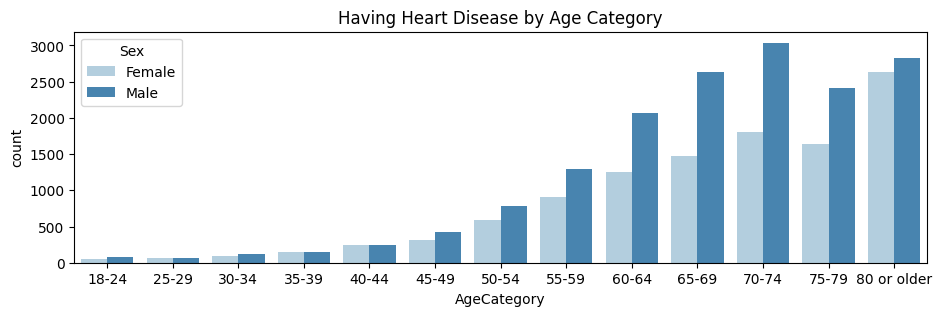

In [95]:
#Having Heart Disease by Age Categories
plt.figure(figsize=(11,3))
plt.title('Having Heart Disease by Age Category')
With_HeartDis = df[df['HeartDisease']=='Yes']
sns.countplot(x=With_HeartDis.AgeCategory.sort_values(),hue=With_HeartDis.Sex,data=df, palette='Blues')
plt.show()

Insight:
* On Females, most people who suffer from heart disease were aged >70 years old
* On Males, most people who suffer from heart disease were on '65-74' and '80 or older' groups


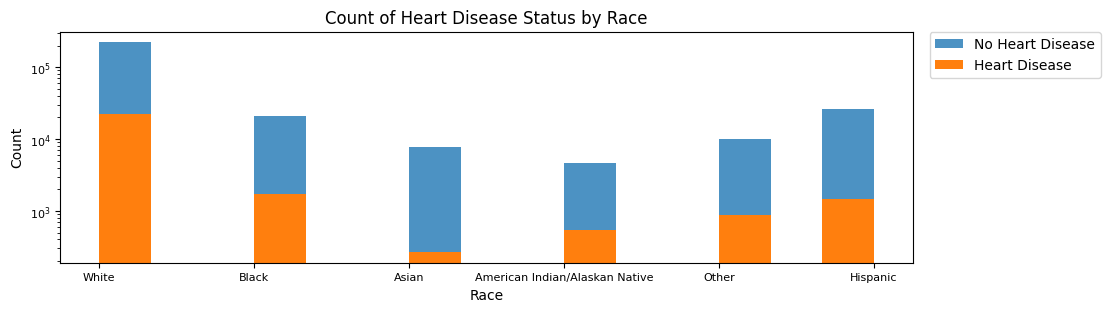

In [96]:
fig, ax = plt.subplots(figsize = (11,3))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=15,alpha=0.8, label="No Heart Disease", log=True)
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins= 15,alpha=1, label="Heart Disease")
ax.set_xlabel("Race")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by Race')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Insight:
* Most people who suffer from heart disease comes from White, Black, and Hispanic races

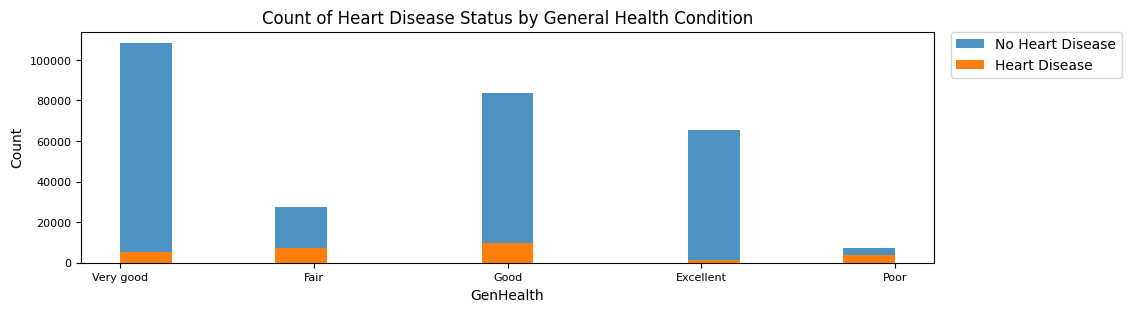

In [97]:
fig, ax = plt.subplots(figsize = (11,3))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=15,alpha=0.8, label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins= 15,alpha=1, label="Heart Disease")
ax.set_xlabel("GenHealth")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by General Health Condition')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Insight:
* Most people who suffer from heart disease, was feeling good about they general health condition

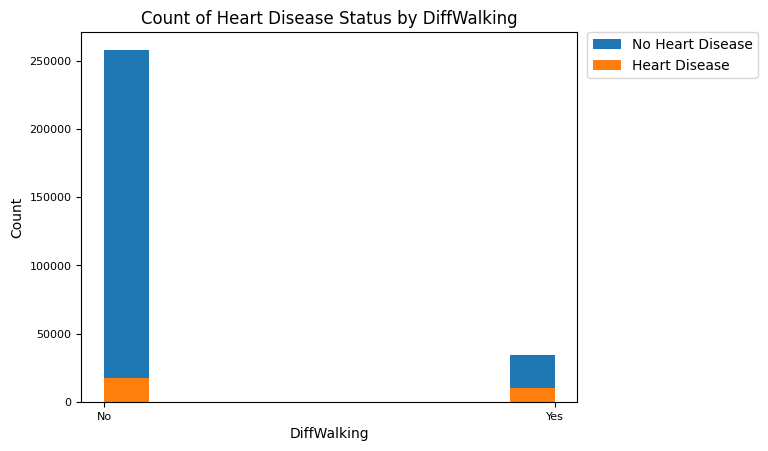

In [98]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["DiffWalking"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["DiffWalking"], label="Heart Disease")
ax.set_xlabel("DiffWalking")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by DiffWalking')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

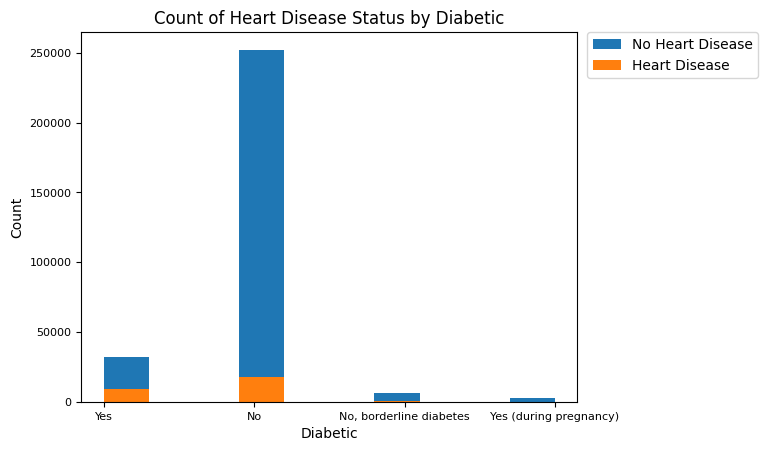

In [99]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["Diabetic"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Diabetic"], label="Heart Disease")
ax.set_xlabel("Diabetic")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by Diabetic')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

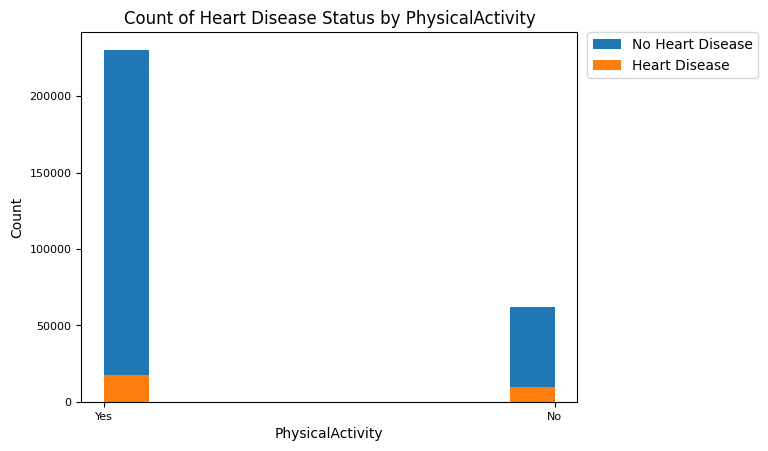

In [100]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], label="Heart Disease")
ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by PhysicalActivity')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Insight:
* Most people whether suffer or not from heart disease doesn't have difficulty to waling/climbing stairs

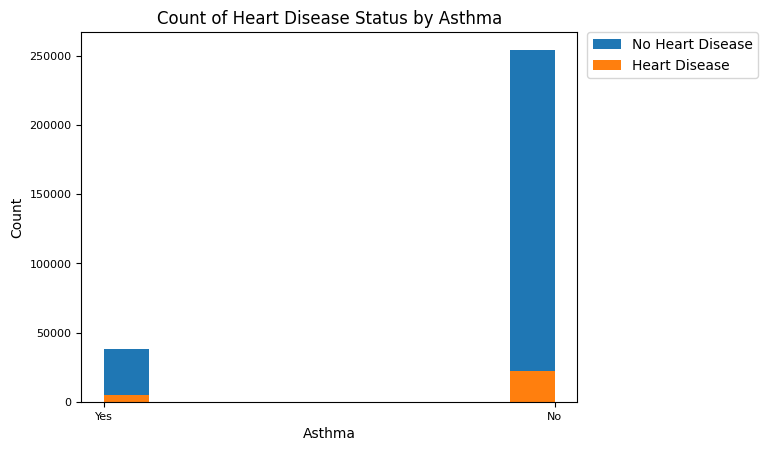

In [101]:
# Asthma	KidneyDisease	SkinCancer
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["Asthma"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Asthma"], label="Heart Disease")
ax.set_xlabel("Asthma")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by Asthma')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

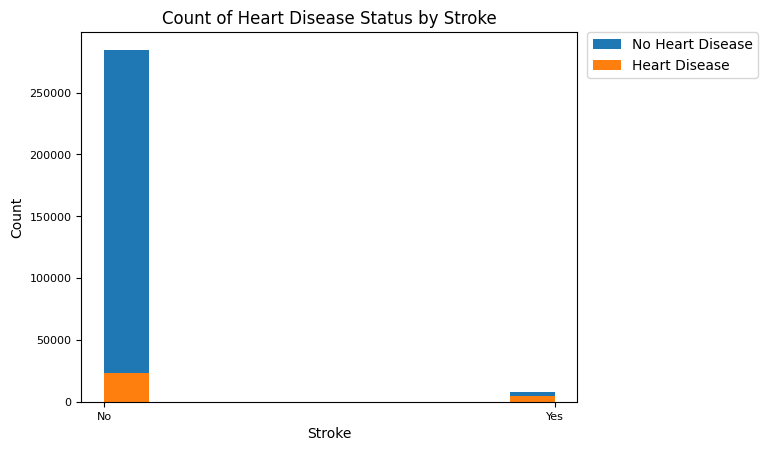

In [102]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["Stroke"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Stroke"], label="Heart Disease")
ax.set_xlabel("Stroke")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by Stroke')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

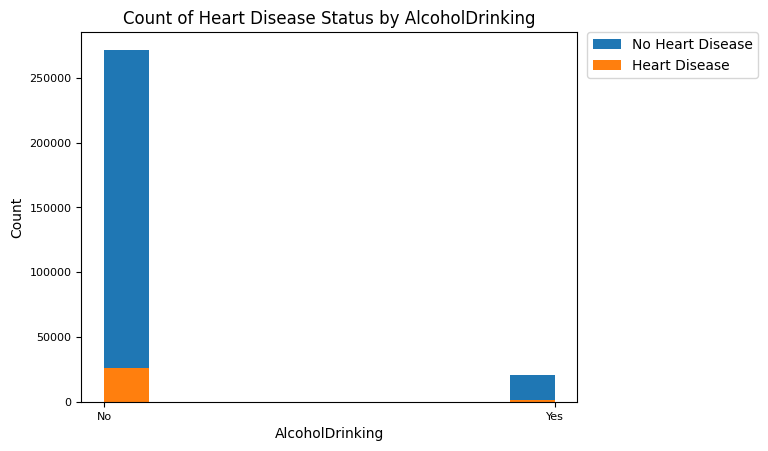

In [103]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["AlcoholDrinking"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["AlcoholDrinking"], label="Heart Disease")
ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by AlcoholDrinking')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

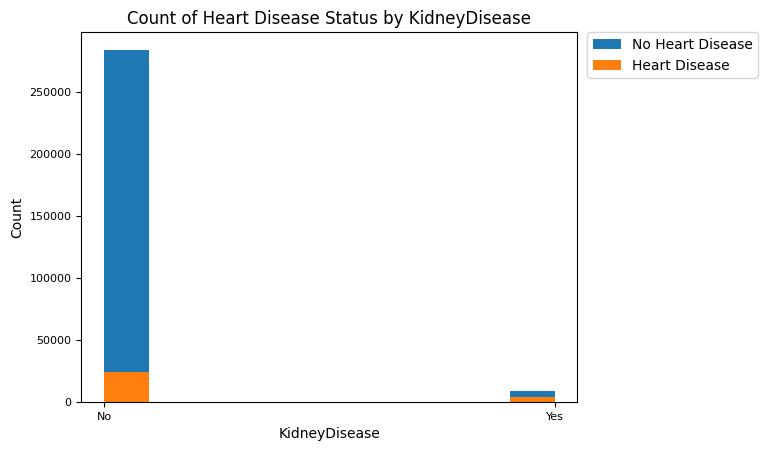

In [104]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["KidneyDisease"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["KidneyDisease"], label="Heart Disease")
ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by KidneyDisease')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

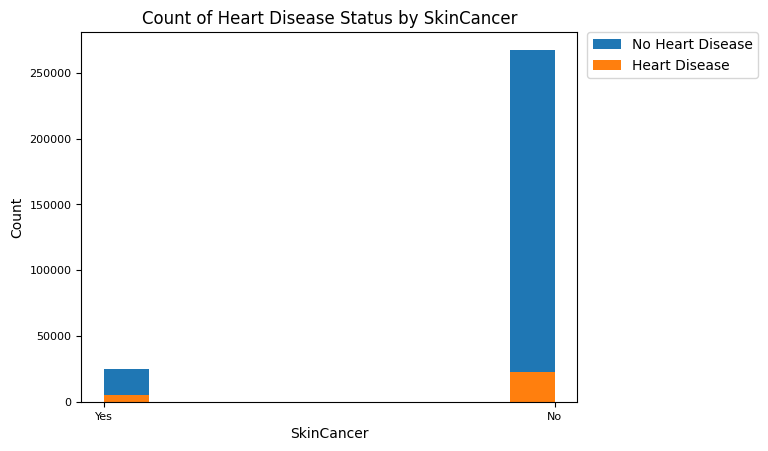

In [105]:
fig, ax = plt.subplots()

ax.hist(df[df["HeartDisease"]=='No']["SkinCancer"] , label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["SkinCancer"], label="Heart Disease")
ax.set_xlabel("SkinCancer")
ax.set_ylabel("Count")
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Count of Heart Disease Status by SkinCancer')

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### The Correlation of The Data

<ipython-input-108-07aaf4ac6bc7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df.corr()


<Axes: >

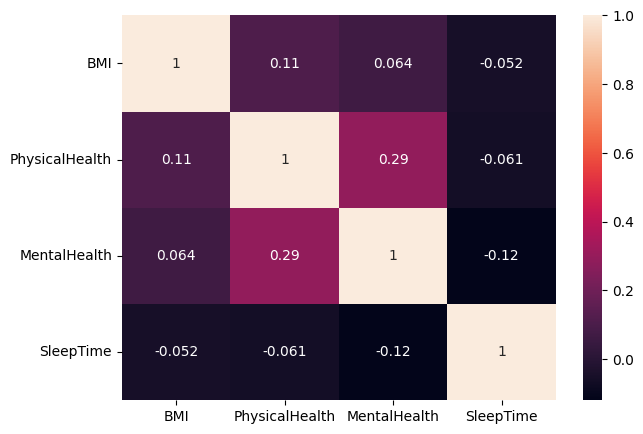

In [108]:
correlation= df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, annot=True)

## Importing the CSV

In [112]:
df.to_csv('/content/heart_2020_cleaned.csv')